# Importar as bibliotecas

# Desafio Final
## Bruno Teles
## José Adeljan

In [ ]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

# Cadastro dos Casos de Teste

Cadastro dos Casos de Teste:


*   Nome
*   Requisitos Cobertos
*   Custo de Execução (R$)



In [ ]:
class CasoTeste():
    def __init__(self, nome, requisitos, custo):
        self.nome = nome
        self.requisitos = requisitos
        self.custo = custo

    def __repr__(self):
        return self.__str__()

    def __str__(self):
        return "Caso de Teste " + self.nome

3 listas para armazenas os atributos dos casos de testes cadastrados

In [ ]:
nomes = ["A", "B", "C", "D", "E"]
requisitos = [2, 5, 4, 6, 1]
custos = [1250, 1500, 1600, 1400, 1150]

In [ ]:
lista_cts = []

for nome, req, custo in zip(nomes, requisitos, custos):
    lista_cts.append(CasoTeste(nome, req, custo))

# Classe Indivíduo

In [ ]:
class Individuo():
    def __init__(self, requisitos, custos, limite_custo, geracao=0):
        self.requisitos = requisitos
        self.custos = custos
        self.limite_custo = limite_custo
        self.nota_avaliacao = 0
        self.custo_usado = 0
        self.geracao = geracao
        self.cromossomo = []

        for _ in range(len(requisitos)):
            if random() < 0.5:
                self.cromossomo.append("0")
            else:
                self.cromossomo.append("1")

    def avaliacao(self):
        nota = 0
        soma_custo = 0
        for i in range(len(self.cromossomo)):
           if self.cromossomo[i] == '1':
               nota += self.requisitos[i]
               soma_custo += self.custos[i]
        if soma_custo > self.limite_custo:
            nota = 1
        self.nota_avaliacao = nota
        self.custo_usado = soma_custo

    def crossover(self, outro_individuo):
        corte = round(random() * len(self.cromossomo))

        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]

        filhos = [Individuo(self.requisitos, self.custos, self.limite_custo, self.geracao + 1),
                  Individuo(self.requisitos, self.custos, self.limite_custo, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        return filhos

    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                if self.cromossomo[i] == '1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'
        return self

# Classe Algoritmo Genético

In [ ]:
class AlgoritmoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []

    def inicializa_populacao(self, requisitos, custos, limite_custo):
        for _ in range(self.tamanho_populacao):
            self.populacao.append(Individuo(requisitos, custos, limite_custo))
        self.melhor_solucao = self.populacao[0]

    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key = lambda populacao: populacao.nota_avaliacao,
                                reverse = True)

    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo

    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
           soma += individuo.nota_avaliacao
        return soma

    def seleciona_pai(self, soma_avaliacao): #Seleção Metodo roleta
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai

    def visualiza_geracao(self):
        melhor = self.populacao[0]
        print("G:%s -> Requisitos: %s Custo: %s Melhor Ind. Geração: %s" % (self.populacao[0].geracao,
                                                               melhor.nota_avaliacao,
                                                               melhor.custo_usado,
                                                               melhor.cromossomo))

    def resolver(self, taxa_mutacao, numero_geracoes, requisitos, custos, limite_custo):
        self.inicializa_populacao(requisitos, custos, limite_custo)

        for individuo in self.populacao:
            individuo.avaliacao()

        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)

        self.visualiza_geracao()

        for geracao in range(numero_geracoes):
            soma_avaliacao = self.soma_avaliacoes()
            nova_populacao = []

            for individuos_gerados in range(0, self.tamanho_populacao, 2):
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)

                filhos = self.populacao[pai1].crossover(self.populacao[pai2])

                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))

            self.populacao = list(nova_populacao)

            for individuo in self.populacao:
                individuo.avaliacao()

            self.ordena_populacao()

            self.visualiza_geracao()

            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)

        print("\nMelhor solução -> G: %s Requisitos: %s Custo: %s Cromossomo: %s" %
              (self.melhor_solucao.geracao,
               self.melhor_solucao.nota_avaliacao,
               self.melhor_solucao.custo_usado,
               self.melhor_solucao.cromossomo))

        return self.melhor_solucao.cromossomo

# Execução Algoritmo

Define os parâmetros:

*   Limite de custo (R$)
*   Tamanho da população
*   Taxa de mutação entre as geracões
*   Número de Gerações



In [ ]:
limite = 6000
tamanho_populacao = 40
taxa_mutacao = 0.01
numero_geracoes = 5

ag = AlgoritmoGenetico(tamanho_populacao)
# taxa_mutacao, numero_geracoes, requisitos, custos, limite_custo
resultado = ag.resolver(taxa_mutacao, numero_geracoes, requisitos, custos, limite)

#Visualização dos resultados
for i in range(len(lista_cts)):
    if resultado[i] == '1':
        print("Nome: %s Requisitos %s " % (lista_cts[i].nome,
                                    lista_cts[i].requisitos))


G:0 -> Requisitos: 16 Custo: 5650 Melhor Ind. Geração: ['0', '1', '1', '1', '1']
G:1 -> Requisitos: 15 Custo: 4500 Melhor Ind. Geração: ['0', '1', '1', '1', '0']
G:2 -> Requisitos: 17 Custo: 5750 Melhor Ind. Geração: ['1', '1', '1', '1', '0']
G:3 -> Requisitos: 16 Custo: 5650 Melhor Ind. Geração: ['0', '1', '1', '1', '1']
G:4 -> Requisitos: 16 Custo: 5650 Melhor Ind. Geração: ['0', '1', '1', '1', '1']
G:5 -> Requisitos: 16 Custo: 5650 Melhor Ind. Geração: ['0', '1', '1', '1', '1']

Melhor solução -> G: 2 Requisitos: 17 Custo: 5750 Cromossomo: ['1', '1', '1', '1', '0']
Nome: A Requisitos 2 
Nome: B Requisitos 5 
Nome: C Requisitos 4 
Nome: D Requisitos 6 


Visualização Gráfica.

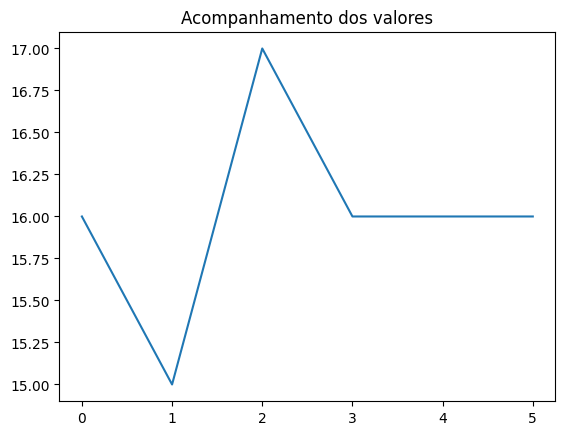

In [ ]:
plt.plot(ag.lista_solucoes)
plt.title("Acompanhamento dos valores")
plt.show()

# Biblioteca DEAP

In [ ]:
!pip install deap

# Registro das classes e métodos

In [ ]:
import random
from deap import base
from deap import creator
from deap import algorithms
from deap import tools


#Cria o toolbox do deap
toolbox = base.Toolbox()

#Cria a base da funcao de aptidao (maximizar) (apenas uma funcao (que é o valor) por isso peso = (1.0,))
creator.create("FitnessMax", base.Fitness, weights=(1.0, ))

#Cria a classe de individuos que é uma lista e terá sua aptidao avaliada pelo FitnessMax
creator.create("Individual", list, fitness=creator.FitnessMax)

#Função para gerar os valores dos cromossomos de forma aleatoria para cada individuo
toolbox.register("attr_bool", random.randint, 0, 1)

#Função para gerar os individuos o número de cromossomos é definido pelo len(requisitos) (numero de casos de teste)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, n=len(requisitos))

#Cria a classe de populacao, que será uma lista e composta por individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
#Função de avaliação
def avaliacao(individual):
    nota = 0
    soma_custo = 0
    for i in range(len(individual)):
       if individual[i] == 1:
           nota += requisitos[i]
           soma_custo += custos[i]
    if soma_custo > limite:
        nota = 1
    return nota,

#registra a funcao de aptidao
toolbox.register("evaluate", avaliacao)

#registro da funcao de crossover
toolbox.register("mate", tools.cxOnePoint)

#registro da funcao de mutação
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)

#registro para selecionar os individuos mais aptos para crossover
toolbox.register("select", tools.selRoulette)



# Execução Algoritmo

In [ ]:
random.seed(1)
populacao = toolbox.population(n = 40)
probabilidade_crossover = 1.0
probabilidade_mutacao = 0.01
numero_geracoes = 100

estatisticas = tools.Statistics(key=lambda individuo: individuo.fitness.values)
estatisticas.register("max", np.max)
estatisticas.register("min", np.min)
estatisticas.register("med", np.mean)
estatisticas.register("std", np.std)

hof = tools.HallOfFame(1)

populacao, info = algorithms.eaSimple(populacao, toolbox,
                                      probabilidade_crossover,
                                      probabilidade_mutacao,
                                      numero_geracoes, estatisticas, halloffame=hof)


##melhores = tools.selBest(populacao, 1)

gen	nevals	max	min	med	std    
0  	40    	17 	0  	9  	3.92428
1  	40    	16 	0  	10.4	4.13401
2  	40    	17 	0  	11.825	3.62552
3  	40    	16 	1  	12.025	3.35773
4  	40    	17 	9  	12.875	2.32581
5  	40    	17 	1  	12.2  	3.95095
6  	40    	17 	1  	12.8  	3.22645
7  	40    	17 	1  	12.4  	3.09677
8  	40    	17 	1  	12.775	3.43138
9  	40    	17 	6  	13.775	2.76123
10 	40    	17 	1  	14    	3.69459
11 	40    	17 	1  	13.95 	4.09237
12 	40    	17 	1  	14.7  	2.63818
13 	40    	17 	1  	15.175	2.42783
14 	40    	17 	1  	14.525	3.89222
15 	40    	16 	1  	15.175	2.32258
16 	40    	16 	15 	15.5  	0.5    
17 	40    	16 	15 	15.65 	0.47697
18 	40    	16 	15 	15.725	0.446514
19 	40    	16 	15 	15.825	0.379967
20 	40    	16 	15 	15.9  	0.3     
21 	40    	16 	15 	15.9  	0.3     
22 	40    	16 	15 	15.975	0.156125
23 	40    	16 	15 	15.975	0.156125
24 	40    	16 	16 	16    	0       
25 	40    	16 	16 	16    	0       
26 	40    	16 	16 	16    	0       
27 	40    	16 	16 	16    	0       
28 	40    	1

Armazena o objeto com as informações em um array.

In [ ]:
# Transforma 'info' em um array estruturado para facilitar a manipulação
info_array = np.array([(d['gen'], d['max']) for d in info], dtype=[('generation', int), ('max_value', float)])

# Encontra o índice do máximo valor na coluna 'max_value'
indice_max = np.argmax(info_array['max_value'])

# Obtém a geração correspondente ao máximo valor
geracao_max = info_array['generation'][indice_max]

Visualizar a melhor solução encontrada.

In [ ]:
melhores = hof
##print(melhores)
print(f'Melhor solução encontrada na geração {geracao_max}')
for individuo in melhores:
    ##print(individuo)
    ##print(individuo.fitness)
    custo = 0
    requisitos_cobertos = 0
    for i in range(len(lista_cts)):
        if individuo[i] == 1:
            custo += custos[i]
            requisitos_cobertos += requisitos[i]
            print("Nome: %s Custo: %s R$ Requisitos Cobertos: %s" % (lista_cts[i].nome,
                                                        lista_cts[i].custo,
                                                        lista_cts[i].requisitos))
    print("Melhor solução: %s  Requisitos Cobertos: %s" % (requisitos_cobertos, custo))

print(hof[0])

Melhor solução encontrada na geração 0
Nome: A Custo: 1250 R$ Requisitos Cobertos: 2
Nome: B Custo: 1500 R$ Requisitos Cobertos: 5
Nome: C Custo: 1600 R$ Requisitos Cobertos: 4
Nome: D Custo: 1400 R$ Requisitos Cobertos: 6
Melhor solução: 17  Requisitos Cobertos: 5750
[1, 1, 1, 1, 0]


Visualização Gráfica

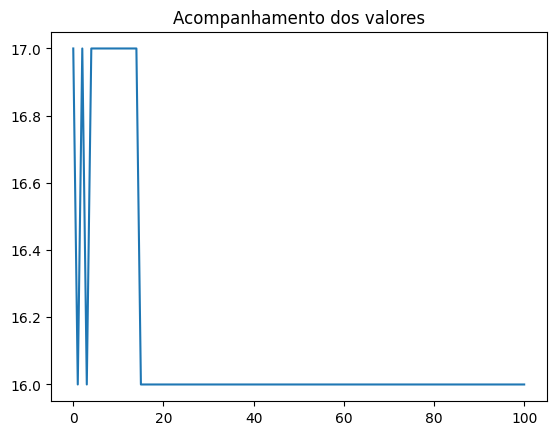

In [ ]:
valores_grafico = info.select("max")
plt.plot(valores_grafico)
plt.title("Acompanhamento dos valores")
plt.show()